# Import Library

In [ ]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Understanding**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Penulisan Ilmiah/ulasan_SIAPkerja.csv')
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,244028f5-a422-4ec6-a543-effb2a514822,Santoso santoso,https://play-lh.googleusercontent.com/a/ACg8oc...,Ini Negri yang ga mau Introspeksi . Sekelas Ap...,2,11,6.0.5,2025-02-25 22:30:09,NaN,NaN,6.0.5
1,c0f094e8-8185-4fa7-b29a-b0d9baa82f72,Desi Alsyfa,https://play-lh.googleusercontent.com/a-/ALV-U...,Dimohon banget kepada admin untuk baca ulasan ...,2,24,6.0.5,2025-01-25 13:55:18,NaN,NaN,6.0.5
2,c09e14e7-bd74-4331-8c76-5255bc8083ad,Cahyana Ajz,https://play-lh.googleusercontent.com/a/ACg8oc...,buka link via web buat lapor atau aduan disuru...,1,29,6.0.5,2025-03-20 10:42:29,NaN,NaN,6.0.5
3,8555d9eb-354b-438a-abb0-5916c8acf7c3,Nopia Hasanah,https://play-lh.googleusercontent.com/a-/ALV-U...,baru juga mau daftar malah tidak bisa padahal ...,1,2,6.0.5,2025-04-06 15:11:30,NaN,NaN,6.0.5
4,a065c0ff-8d92-4634-982f-6229cb8b52e9,Angga Pembrani,https://play-lh.googleusercontent.com/a/ACg8oc...,tolong bantu kenapa claim ke 3 tidak bisa di p...,3,6,6.0.5,2025-03-26 01:38:42,NaN,NaN,6.0.5
...,...,...,...,...,...,...,...,...,...,...,...
1955,3dfd35ba-3c96-4d03-94fd-eb8f23255b8d,Helmi Ska,https://play-lh.googleusercontent.com/a/ACg8oc...,Bagus banget,5,0,NaN,2024-07-24 13:47:16,NaN,NaN,NaN
1956,88151efd-5819-44aa-b1ca-dc29e43e545a,mikael .badii1996,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplikasi bkn,5,0,NaN,2023-03-10 02:23:57,NaN,NaN,NaN
1957,1dc2a031-d01c-4d5e-ad92-036301c96efd,RahmanM,https://play-lh.googleusercontent.com/a-/ALV-U...,Good job,5,0,NaN,2022-11-07 04:21:07,NaN,NaN,NaN
1958,e8453cca-861c-4f90-ad7f-8f2e92eee85f,akmal farizd,https://play-lh.googleusercontent.com/a-/ALV-U...,.kk,5,0,NaN,2024-09-22 08:07:13,NaN,NaN,NaN


In [ ]:
df = df[['content','score']]
df

,content,score
0,Ini Negri yang ga mau Introspeksi . Sekelas Ap...,2
1,Dimohon banget kepada admin untuk baca ulasan ...,2
2,buka link via web buat lapor atau aduan disuru...,1
3,baru juga mau daftar malah tidak bisa padahal ...,1
4,tolong bantu kenapa claim ke 3 tidak bisa di p...,3
...,...,...
1955,Bagus banget,5
1956,Aplikasi bkn,5
1957,Good job,5
1958,.kk,5


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1LZh0r_95yc9ITPvB_2MKYizd8vHRp9Yt4lnFaaYQKbk/edit#gid=0


/tmp/ipython-input-440-3869732245.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='score', data=df, palette='viridis')


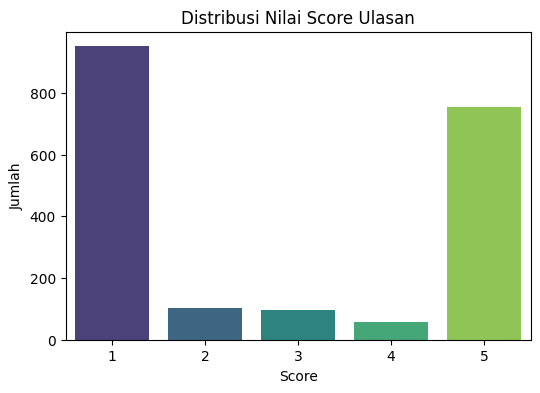

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='score', data=df, palette='viridis')
plt.title('Distribusi Nilai Score Ulasan')
plt.xlabel('Score')
plt.ylabel('Jumlah')
plt.show()

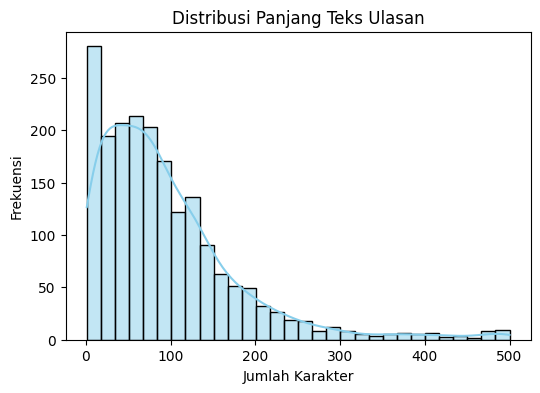

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Gabungkan semua teks jadi satu
all_text = ' '.join(df['content'])

# Tokenisasi manual (memisahkan berdasarkan spasi)
tokens = all_text.split()

# Hitung frekuensi kata
word_counts = Counter(tokens)

# Ambil 10 kata yang paling sering muncul
most_common_words = word_counts.most_common(10)

# Tampilkan
print("10 Kata yang Paling Sering Muncul:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

# Opsional: Visualisasi
words, freqs = zip(*most_common_words)
plt.figure(figsize=(10,6))
plt.bar(words, freqs, color='skyblue')
plt.title('10 Kata yang Paling Sering Muncul')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

# **Data Preparation**

In [ ]:
score = df['score']


##Cleansing Data

In [ ]:
import re
import string

def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # Emotikon wajah
        u"\U0001F300-\U0001F5FF"  # Simbol & pictographs
        u"\U0001F680-\U0001F6FF"  # Transportasi & simbol
        u"\U0001F1E0-\U0001F1FF"  # Bendera
        u"\U00002700-\U000027BF"  # Simbol tambahan
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

def cleansing(text):
    text = str(text)
    text = re.sub(r'<.*?>', '', text)                                # Hapus tag HTML
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)              # Hapus URL
    text = re.sub(r'\d+', '', text)                                  # Hapus angka
    text = re.sub(r'(.)\1{2,}', r'\1', text)                         # Huruf berulang
    text = re.sub(rf"[{re.escape(string.punctuation)}]", '', text)   # Hapus tanda baca
    text = remove_emoji(text)                                        # Hapus emoji
    text = re.sub(r'\s+', ' ', text).strip()                         # Hapus spasi berlebih
    return text

# Contoh penggunaan:
# df = pd.read_csv('ulasan_playstore.csv')
df['content'] = df['content'].apply(lambda x: cleansing(x))

# Lihat hasilnya
df.head()


,content,score
0,Ini Negri yang ga mau Introspeksi Sekelas Apli...,2
1,Dimohon banget kepada admin untuk baca ulasan ...,2
2,buka link via web buat lapor atau aduan disuru...,1
3,baru juga mau daftar malah tidak bisa padahal ...,1
4,tolong bantu kenapa claim ke tidak bisa di pro...,3


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1rHhr-BM1k7NY3fyM-R1jddODZxCLs7EtcBzoISlsRtA/edit#gid=0


##Case folding

In [ ]:
#Case Folding

df['content'] = df['content'].str.lower()

df.head()

,content,score
0,ini negri yang ga mau introspeksi sekelas apli...,2
1,dimohon banget kepada admin untuk baca ulasan ...,2
2,buka link via web buat lapor atau aduan disuru...,1
3,baru juga mau daftar malah tidak bisa padahal ...,1
4,tolong bantu kenapa claim ke tidak bisa di pro...,3


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1QLXHvISwdq1iSA0yUxVzX-0CatAZWteZ8TfgOCGSRv8/edit#gid=0


##Remove Duplicate

In [ ]:
df.shape

(1960, 2)

In [ ]:
df = df.drop_duplicates(subset='content')

In [ ]:
df['content'] = df['content'].fillna('')

In [ ]:
df.shape

(1839, 2)

##Normalisasi

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Membaca kamus slang pertama (CSV)
slang_dictionary = pd.read_csv('/content/drive/MyDrive/Penulisan Ilmiah/colloquial-indonesian-lexicon.csv')
slang_dict = pd.Series(slang_dictionary['formal'].values, index=slang_dictionary['slang']).to_dict()

# Membaca kamus slang kedua (TXT dengan tab sebagai pemisah)
slang_dictionary1 = pd.read_csv('/content/drive/MyDrive/Penulisan Ilmiah/kbba.txt', sep='\t')
slang_dict1 = pd.Series(slang_dictionary1['tujuan'].values, index=slang_dictionary1['7an']).to_dict()

# Membaca kamus slang ketiga (TXT dengan ':' sebagai pemisah)
slang_dictionary2 = pd.read_csv('/content/drive/MyDrive/Penulisan Ilmiah/slangword.txt', sep=':', header=None, names=['slang', 'formal'])
slang_dict2 = pd.Series(slang_dictionary2['formal'].values, index=slang_dictionary2['slang']).to_dict()

# Gabungkan semua kamus slang
combined_slang_dict = {**slang_dict, **slang_dict1, **slang_dict2}

# Fungsi normalisasi
def normalize_text(text):
    words = text.split()
    normalized_words = [combined_slang_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

df['content'] = df['content'].apply(lambda x: normalize_text(x))

df.head()


,content,score
0,ini negeri yang tidak mau introspeksi sekelas ...,2
1,dimohon banget kepada admin untuk baca ulasan ...,2
2,buka link via web buat lapor atau aduan disuru...,1
3,baru juga mau daftar bahkan tidak bisa padahal...,1
4,tolong bantu kenapa claim ke tidak bisa di pro...,3


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1I1NsPx912wOx-DrEmqOW9a1ammF2zUXBui12BXiQSsQ/edit#gid=0


##Stopwords

In [ ]:
!pip install sastrawi

In [ ]:
# Stopwords
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ['tidak',' tidak',' tidak ','bukan', 'aja']

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopword(x))
df.head()

,content,score
0,negeri mau introspeksi sekelas aplikasi satu n...,2
1,dimohon banget admin baca ulasan pernah melama...,2
2,buka link via web buat lapor aduan disuruh und...,1
3,baru mau daftar bahkan bisa padahal semuanya b...,1
4,bantu claim tidak proses misi selesaikan semua...,3


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1m6BJmpT6kV8iDw2XEdwWBHR-RrfEs30-NNrPejZObXQ/edit#gid=0


##Tokenize

In [ ]:
from nltk.tokenize import word_tokenize  # Tokenisasi teks

In [ ]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

,content
0,"[negeri, mau, introspeksi, sekelas, aplikasi, ..."
1,"[dimohon, banget, admin, baca, ulasan, pernah,..."
2,"[buka, link, via, web, buat, lapor, aduan, dis..."
3,"[baru, mau, daftar, bahkan, bisa, padahal, sem..."
4,"[bantu, claim, tidak, proses, misi, selesaikan..."
...,...
1952,"[nomor, like]"
1953,[bagus]
1954,"[jadi, hiburan]"
1956,[aplikasi]


In [ ]:
tokenized.to_csv('/content/tokenized_output.csv', index=False)

##Stemming

In [ ]:
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
# Stemming
def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv("/content/sample_data/hasil_preprocessingData.csv", index=False)

In [ ]:
df["tokens"]

,tokens
0,"[negeri, mau, introspeksi, kelas, aplikasi, sa..."
1,"[mohon, banget, admin, baca, ulas, pernah, lam..."
2,"[buka, link, via, web, buat, lapor, adu, suruh..."
3,"[baru, mau, daftar, bahkan, bisa, padahal, sem..."
4,"[bantu, claim, tidak, proses, misi, selesai, s..."
...,...
1834,"[nomor, like]"
1835,[bagus]
1836,"[jadi, hibur]"
1837,[aplikasi]


#**Modeling**

##PALABELAN

###Pelabelan menggunakan Lexicon

In [ ]:
df = pd.read_csv("/content/sample_data/hasil_preprocessingData.csv")
df["content"] = df["content"].fillna("")

df["text_tokens"] = df["content"].str.split()
df["text_str"] = df["text_tokens"].apply(lambda x: " ".join(x))

def load_lexicon_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return {line.strip().lower() for line in f if line.strip()}

lexicons = {
    "positive": load_lexicon_from_file('/content/positive.txt'),
    "negative": load_lexicon_from_file('/content/negative.txt')
}

def get_sentiment(text_tokens):
    score = sum(
        (1 if word in lexicons["positive"] else -1 if word in lexicons["negative"] else 0)
        for word in text_tokens
    )
    sentiment = "positif" if score > 0 else "negatif" if score < 0 else "netral"
    return score, sentiment

results = df["text_tokens"].apply(get_sentiment)
results = list(zip(*results))
df["score"] = results[0]
df["label"] = results[1]


In [ ]:
print(df[["content", "score", "label"]])

                                                content  score    label
0     negeri mau introspeksi kelas aplikasi satu neg...     -3  negatif
1     mohon banget admin baca ulas pernah lamar kerj...      0   netral
2     buka link via web buat lapor adu suruh unduh a...     -1  negatif
3     baru mau daftar bahkan bisa padahal semua bena...      3  positif
4     bantu claim tidak proses misi selesai semua te...      0   netral
...                                                 ...    ...      ...
1834                                         nomor like      0   netral
1835                                              bagus      1  positif
1836                                         jadi hibur      0   netral
1837                                           aplikasi      0   netral
1838                                              kakak      0   netral

[1839 rows x 3 columns]


In [ ]:
print(f"Total kata positif: {len(lexicons['positive'])}")
print(f"Total kata negatif: {len(lexicons['negative'])}")
print("\nDistribusi Sentimen:")
print(df["label"].value_counts())

Total kata positif: 1178
Total kata negatif: 2389

Distribusi Sentimen:
label
positif    843
netral     511
negatif    485
Name: count, dtype: int64


# Splitting

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
import nltk

nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df['content']
y = df['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 1471
Banyak data x_test  : 368
Banyak data y_train : 1471
Banyak data y_test  : 368


##TRAINING DATA

In [ ]:
# 4. TF-IDF Vektorisasi
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(x_train)
X_test_tfidf = tfidf.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi dan pelatihan model Logistic Regression
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)  # y_train = label data latih


LogisticRegression()

#**Evaluation**

##EVALUASI MODEL

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prediksi terhadap data uji
y_pred = model.predict(X_test_tfidf)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy:.2f}")

# Menampilkan classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Akurasi model: 0.82
Classification Report:
              precision    recall  f1-score   support

     negatif       0.89      0.82      0.85       109
      netral       0.70      0.70      0.70        96
     positif       0.85      0.90      0.87       163

    accuracy                           0.82       368
   macro avg       0.81      0.80      0.81       368
weighted avg       0.82      0.82      0.82       368

Confusion Matrix:
[[ 89  14   6]
 [  9  67  20]
 [  2  15 146]]


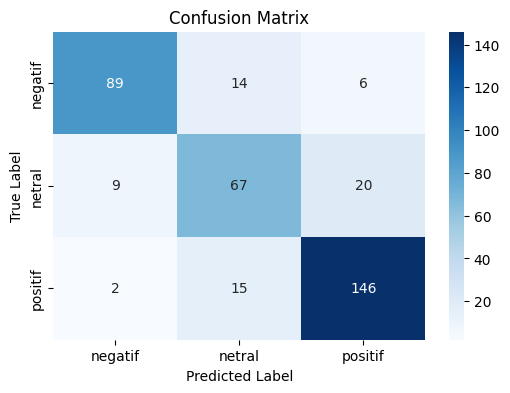

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix dengan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



##VISUALISASI SENTIMEN

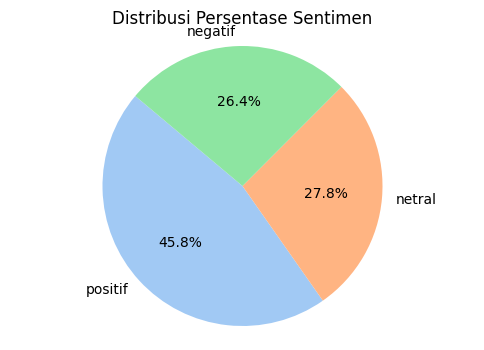

In [ ]:
# Hitung persentase distribusi label
label_counts = df['label'].value_counts(normalize=True) * 100
labels = label_counts.index
sizes = label_counts.values

# Pie chart
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribusi Persentase Sentimen')
plt.axis('equal')
plt.show()

In [ ]:
data_negatif = df[df['label'] == 'negatif']
data_positif = df[df['label'] == 'positif']
data_netral = df[df['label'] == 'netral']

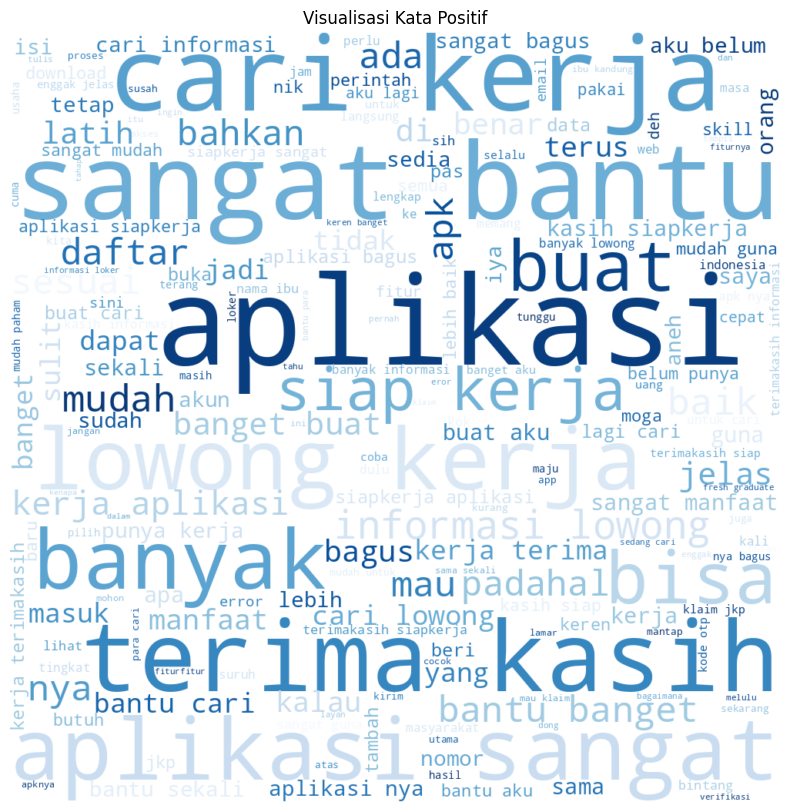

In [ ]:
# Gabungkan semua teks dari data_positif["content"]
all_text_s1 = " ".join(data_positif["content"].astype(str))

# Buat word cloud dengan parameter yang mirip dengan program pertama
wordcloud = WordCloud(
    max_font_size=160,
    margin=0,
    background_color="white",
    colormap="Blues",
    width=1000,
    height=1000,
    mode="RGBA"
).generate(all_text_s1)

# Tampilkan word cloud
plt.figure(figsize=[10, 10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Visualisasi Kata Positif")
plt.show()

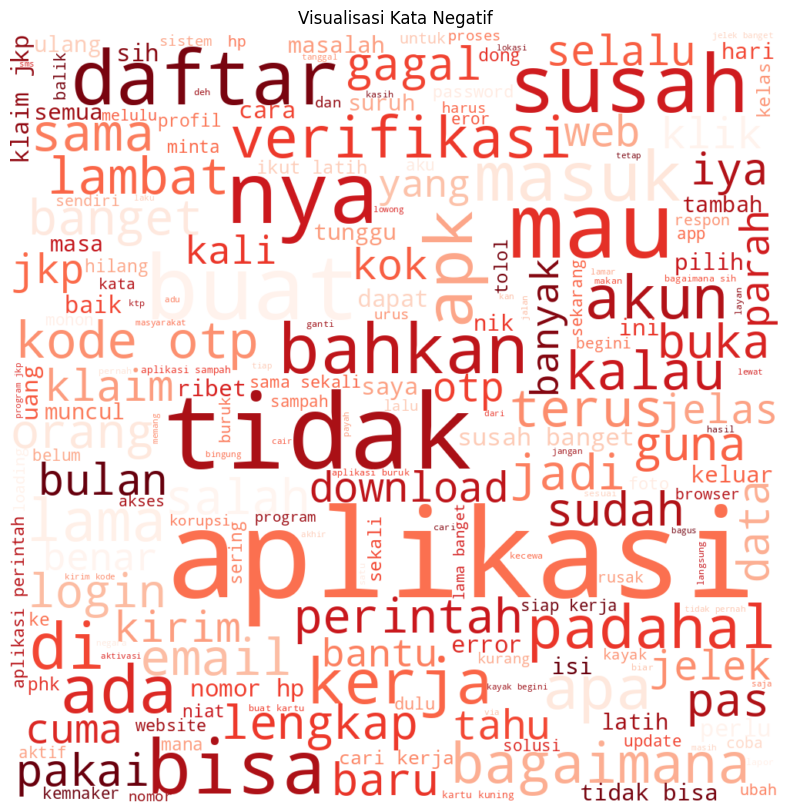

In [ ]:
# Gabungkan semua teks dari data_negatif["content"]
all_text_s1 = " ".join(data_negatif["content"].astype(str))

# Buat word cloud dengan parameter yang konsisten
wordcloud = WordCloud(
    max_font_size=160,
    margin=0,
    background_color="white",
    colormap="Reds",
    width=1000,
    height=1000,
    mode="RGBA"
).generate(all_text_s1)

# Tampilkan word cloud
plt.figure(figsize=[10, 10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Visualisasi Kata Negatif")
plt.show()

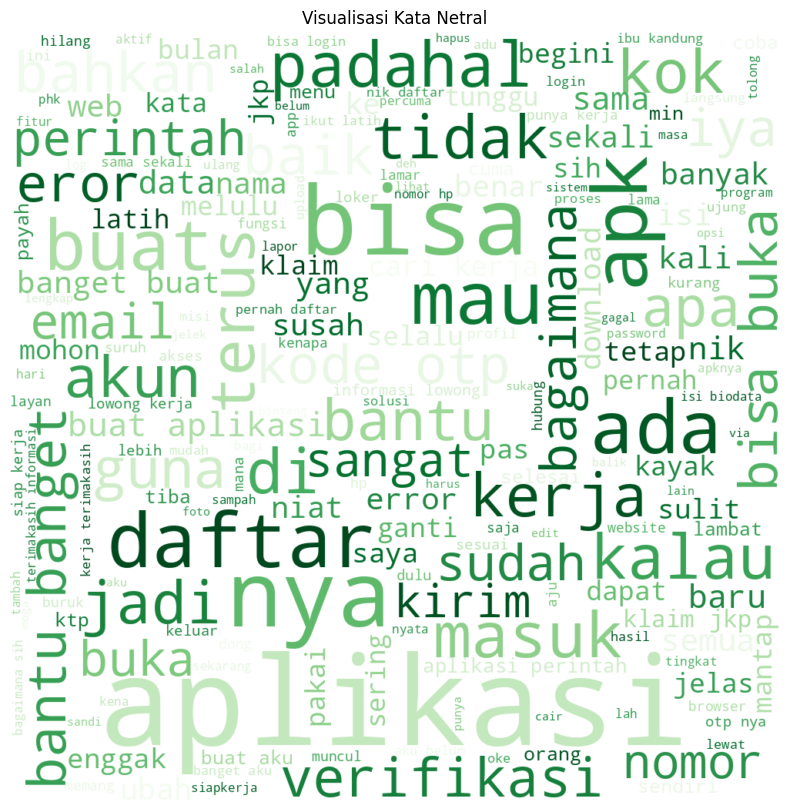

In [ ]:
# Gabungkan semua teks dari data_negatif["content"]
all_text_s1 = " ".join(data_netral["content"].astype(str))

# Buat word cloud dengan parameter yang konsisten
wordcloud = WordCloud(
    max_font_size=160,
    margin=0,
    background_color="white",
    colormap="Greens",
    width=1000,
    height=1000,
    mode="RGBA"
).generate(all_text_s1)

# Tampilkan word cloud
plt.figure(figsize=[10, 10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Visualisasi Kata Netral")
plt.show()